# Connect with MYSQL.

In [20]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# MySQL connection
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='password',
    database='churn'
)
cur = conn.cursor()

# Overall churn rate.

  Churn  customer_count
0   Yes            3738
1    No           10348
Overall churn rate: 26.54%


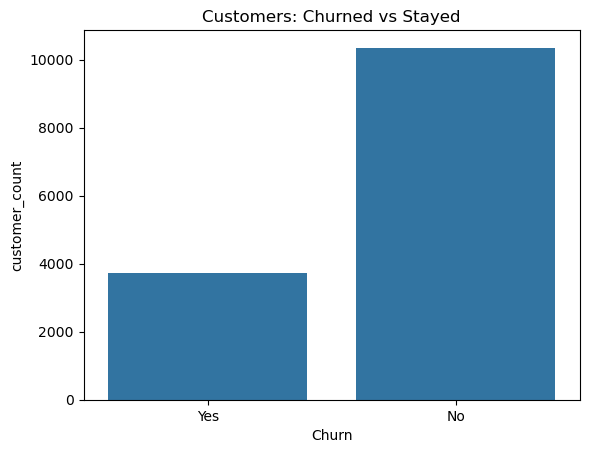

In [40]:
# Query to get churned vs stayed customer counts
query = """
SELECT 
    Churn_Label AS Churn,
    COUNT(*) AS customer_count
FROM telco_customer_churn
GROUP BY Churn_Label;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Churn', 'customer_count'])
print(df)

# Calculate churn rate percentage
total = df['customer_count'].sum()
churned = df.loc[df['Churn'] == 'Yes', 'customer_count'].values[0]
churn_rate = churned / total * 100
print(f"Overall churn rate: {churn_rate:.2f}%")

# Plot bar chart showing churned vs stayed customers
sns.barplot(data=df, x='Churn', y='customer_count')
plt.title("Customers: Churned vs Stayed")
plt.show()

# Churn trend over months.

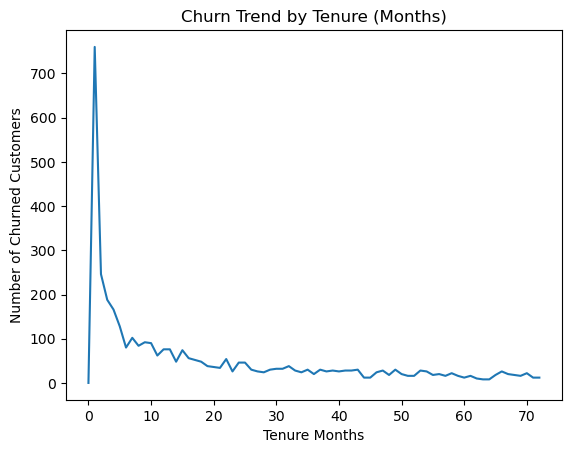

In [48]:
# Query churn count by tenure months
query = """
SELECT Tenure_Months, 
       SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) AS churned_customers,
       COUNT(*) AS total_customers
FROM telco_customer_churn
GROUP BY Tenure_Months
ORDER BY Tenure_Months;
"""

cur.execute(query)
data = cur.fetchall()
df_trend = pd.DataFrame(data, columns=['Tenure_Months', 'churned_customers', 'total_customers'])

# Line plot showing churn trend by tenure
sns.lineplot(data=df_trend, x='Tenure_Months', y='churned_customers')
plt.title("Churn Trend by Tenure (Months)")
plt.xlabel("Tenure Months")
plt.ylabel("Number of Churned Customers")
plt.show()

#  Revenue loss due to churn.

In [23]:
# Query sum of Monthly Charges for churned customers
query = """
SELECT SUM(Monthly_Charges) AS revenue_loss
FROM telco_customer_churn
WHERE Churn_Label = 'Yes';
"""

cur.execute(query)
revenue_loss = cur.fetchone()[0]
print(f"Estimated revenue loss due to churn: ${revenue_loss:.2f}")


Estimated revenue loss due to churn: $278261.70


# Churn rate by Gender.

   Gender churned  total churn_rate
0    Male    1860   7110      26.16
1  Female    1878   6976      26.92


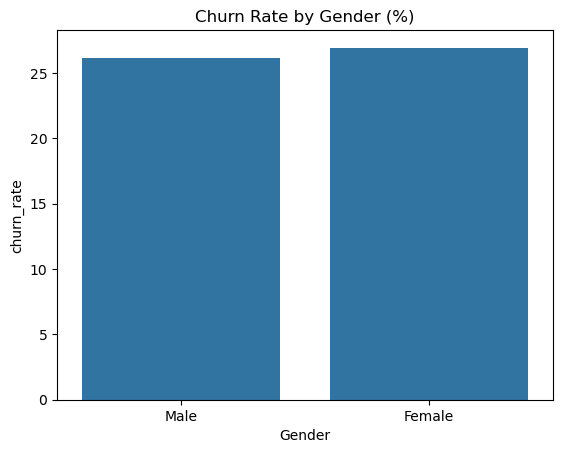

In [49]:
# Query churn counts and rates by gender
query = """
SELECT Gender,
       SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) AS churned,
       COUNT(*) AS total,
       ROUND(100 * SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS churn_rate
FROM telco_customer_churn
GROUP BY Gender;
"""

cur.execute(query)
data = cur.fetchall()
df_gender = pd.DataFrame(data, columns=['Gender', 'churned', 'total', 'churn_rate'])
print(df_gender)

# Plot churn rate by gender
sns.barplot(data=df_gender, x='Gender', y='churn_rate')
plt.title("Churn Rate by Gender (%)")
plt.show()


# Churn rate by Senior Citizen status.

  Senior_Citizen churned  total churn_rate
0             No    2786  11802      23.61
1            Yes     952   2284      41.68


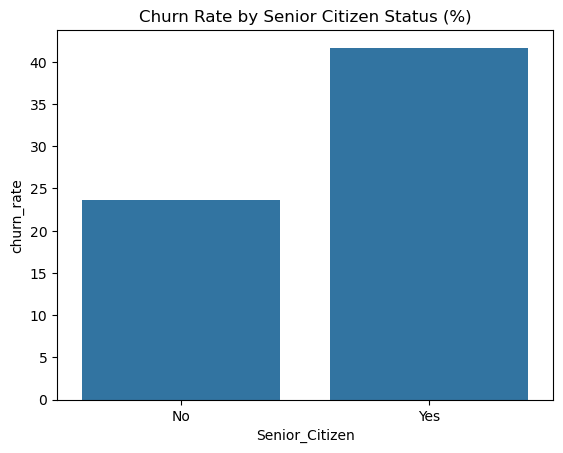

In [44]:
# Query churn counts and rates by senior citizen status
query = """
SELECT Senior_Citizen,
       SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) AS churned,
       COUNT(*) AS total,
       ROUND(100 * SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS churn_rate
FROM telco_customer_churn
GROUP BY Senior_Citizen;
"""

cur.execute(query)
data = cur.fetchall()
df_senior = pd.DataFrame(data, columns=['Senior_Citizen', 'churned', 'total', 'churn_rate'])
print(df_senior)
# Plot churn rate by senior citizen status
sns.barplot(data=df_senior, x='Senior_Citizen', y='churn_rate')
plt.title("Churn Rate by Senior Citizen Status (%)")
plt.show()


# Churn rate by City (Top 10).

            City churned  total churn_rate
0       Maricopa       8      8     100.00
1     Fort Jones       8      8     100.00
2         Tipton       8      8     100.00
3  Boulder Creek       8      8     100.00
4    Smith River       8      8     100.00
5   Johannesburg       8      8     100.00
6      Riverbank       8      8     100.00
7     Wrightwood       8      8     100.00
8          Twain       8      8     100.00
9       Eldridge       8      8     100.00


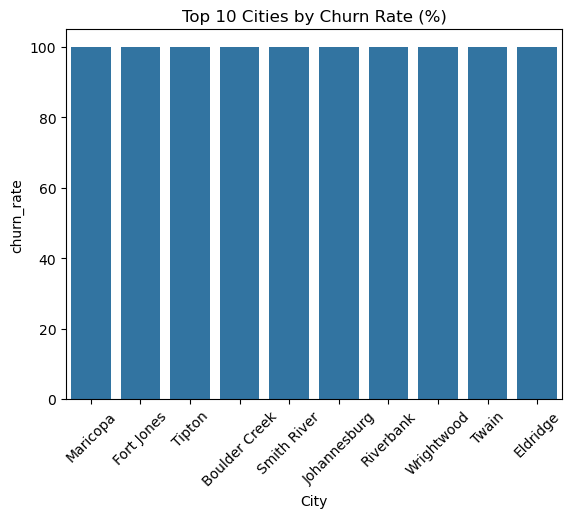

In [29]:
# Query churn rate by city, top 10 highest churn rate
query = """
SELECT City,
       SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) AS churned,
       COUNT(*) AS total,
       ROUND(100 * SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS churn_rate
FROM telco_customer_churn
GROUP BY City
ORDER BY churn_rate DESC
LIMIT 10;
"""

cur.execute(query)
data = cur.fetchall()
df_city = pd.DataFrame(data, columns=['City', 'churned', 'total', 'churn_rate'])
print(df_city)

# Plot churn rate by city
sns.barplot(data=df_city, x='City', y='churn_rate')
plt.title("Top 10 Cities by Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()


# Churn rate by Internet Service type.

  Internet_Service churned  total churn_rate
0              DSL     918   4842      18.96
1      Fiber optic    2594   6192      41.89
2               No     226   3052       7.40


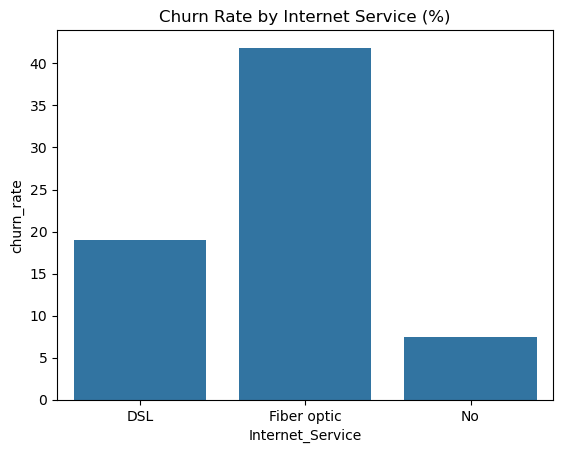

In [30]:
# Query churn rate by Internet Service type
query = """
SELECT Internet_Service,
       SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) AS churned,
       COUNT(*) AS total,
       ROUND(100 * SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS churn_rate
FROM telco_customer_churn
GROUP BY Internet_Service;
"""

cur.execute(query)
data = cur.fetchall()
df_internet = pd.DataFrame(data, columns=['Internet_Service', 'churned', 'total', 'churn_rate'])
print(df_internet)
# Plot churn rate by Internet Service
sns.barplot(data=df_internet, x='Internet_Service', y='churn_rate')
plt.title("Churn Rate by Internet Service (%)")
plt.show()


# Churn rate by Contract type.

         Contract churned  total churn_rate
0  Month-to-month    3310   7750      42.71
1        Two year      96   3390       2.83
2        One year     332   2946      11.27


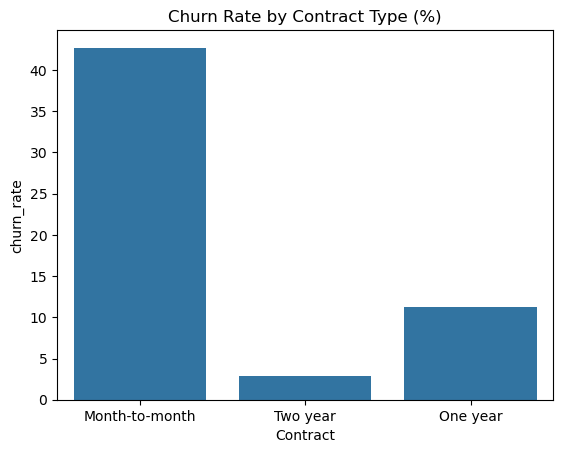

In [31]:
# Query churn rate by Contract type
query = """
SELECT Contract,
       SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) AS churned,
       COUNT(*) AS total,
       ROUND(100 * SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS churn_rate
FROM telco_customer_churn
GROUP BY Contract;
"""

cur.execute(query)
data = cur.fetchall()
df_contract = pd.DataFrame(data, columns=['Contract', 'churned', 'total', 'churn_rate'])
print(df_contract)
# Plot churn rate by Contract type
sns.barplot(data=df_contract, x='Contract', y='churn_rate')
plt.title("Churn Rate by Contract Type (%)")
plt.show()


# Churn rate by Payment Method.

              Payment_Method churned  total churn_rate
0               Mailed check     616   3224      19.11
1           Electronic check    2142   4730      45.29
2  Bank transfer (automatic)     516   3088      16.71
3    Credit card (automatic)     464   3044      15.24


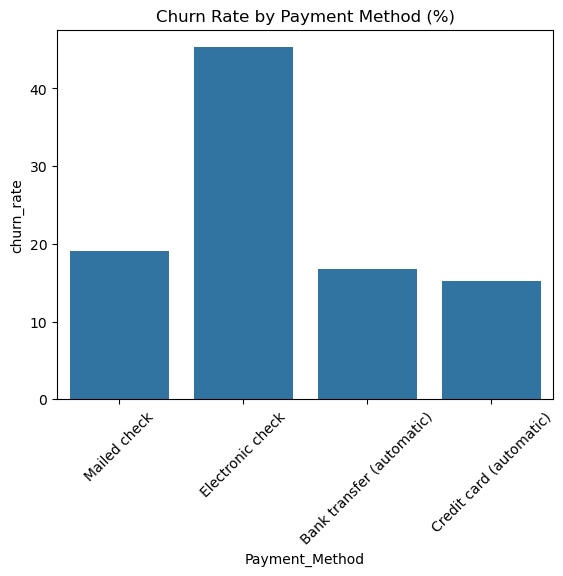

In [36]:
# Query to calculate churn rate grouped by different payment methods
query = """
SELECT Payment_Method,
       SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) AS churned,
       COUNT(*) AS total,
       ROUND(100 * SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS churn_rate
FROM telco_customer_churn
GROUP BY Payment_Method;
"""

cur.execute(query)
data = cur.fetchall()

# Convert SQL result to DataFrame
df_payment = pd.DataFrame(data, columns=['Payment_Method', 'churned', 'total', 'churn_rate'])
print(df_payment)
# Visualize churn rate by payment method using barplot
sns.barplot(data=df_payment, x='Payment_Method', y='churn_rate')
plt.title("Churn Rate by Payment Method (%)")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


# Churn by Tenure (Short-term vs Long-term customers).

  Tenure_Group churned  total churn_rate
0   Short-term    2074   4372      47.44
1    Long-term    1664   9714      17.13


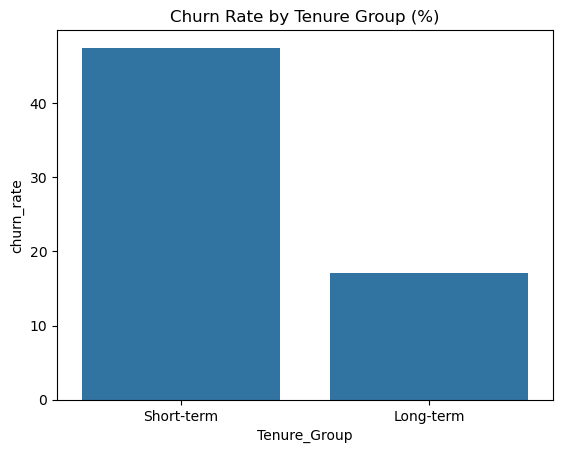

In [46]:
# Define short-term as tenure <= 12 months and long-term as tenure > 12 months
# Calculate churn rate for each tenure group
query = """
SELECT 
    CASE WHEN Tenure_Months <= 12 THEN 'Short-term' ELSE 'Long-term' END AS Tenure_Group,
    SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) AS churned,
    COUNT(*) AS total,
    ROUND(100 * SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS churn_rate
FROM telco_customer_churn
GROUP BY Tenure_Group;
"""

cur.execute(query)
data = cur.fetchall()

# Load result into DataFrame
df_tenure = pd.DataFrame(data, columns=['Tenure_Group', 'churned', 'total', 'churn_rate'])
print(df_tenure)

# Plot churn rate by tenure group
sns.barplot(data=df_tenure, x='Tenure_Group', y='churn_rate')
plt.title("Churn Rate by Tenure Group (%)")
plt.show()


# Monthly Charges distribution by churn status.

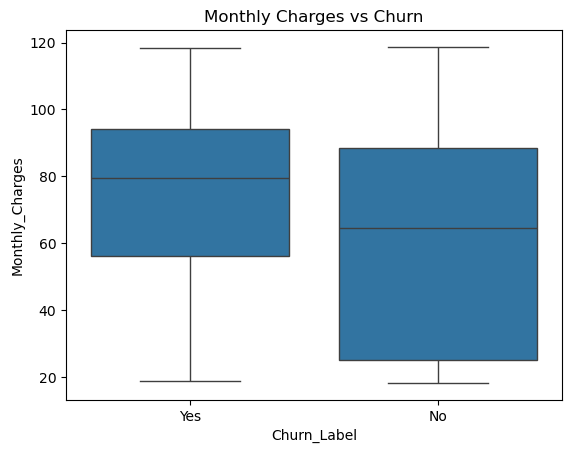

In [50]:
# Query Monthly Charges and Churn_Label for boxplot
query = "SELECT Monthly_Charges, Churn_Label FROM telco_customer_churn;"

cur.execute(query)
data = cur.fetchall()
df_charges = pd.DataFrame(data, columns=['Monthly_Charges', 'Churn_Label'])

# Plot boxplot of Monthly Charges by Churn status
sns.boxplot(data=df_charges, x='Churn_Label', y='Monthly_Charges')
plt.title("Monthly Charges vs Churn")
plt.show()


# Churn rate by Total Charges Bucket.

  Charge_Bucket churned  total churn_rate
0        0-1000    2140   5786      36.99
1     1001-3000     898   3892      23.07
2     3001-5000     386   2136      18.07
3         5000+     314   2272      13.82


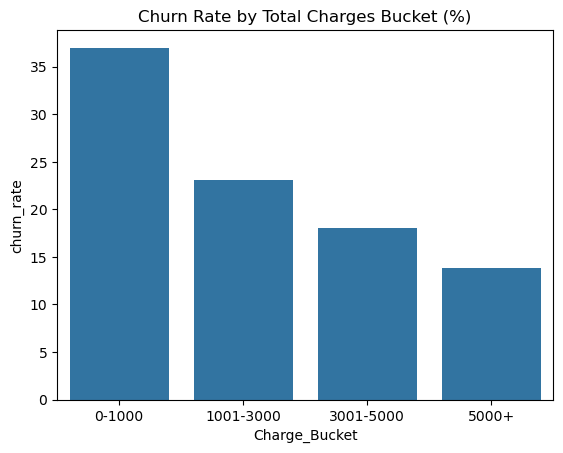

In [47]:
# Bucket total charges into ranges for analysis
# Calculate churn rate for each total charges bucket
query = """
SELECT 
    CASE
        WHEN Total_Charges <= 1000 THEN '0-1000'
        WHEN Total_Charges BETWEEN 1001 AND 3000 THEN '1001-3000'
        WHEN Total_Charges BETWEEN 3001 AND 5000 THEN '3001-5000'
        ELSE '5000+'
    END AS Charge_Bucket,
    SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) AS churned,
    COUNT(*) AS total,
    ROUND(100 * SUM(CASE WHEN Churn_Label = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS churn_rate
FROM telco_customer_churn
GROUP BY Charge_Bucket
ORDER BY Charge_Bucket;
"""

cur.execute(query)
data = cur.fetchall()

# Load into DataFrame
df_charges = pd.DataFrame(data, columns=['Charge_Bucket', 'churned', 'total', 'churn_rate'])
print(df_charges)
# Plot churn rate by total charges bucket
sns.barplot(data=df_charges, x='Charge_Bucket', y='churn_rate')
plt.title("Churn Rate by Total Charges Bucket (%)")
plt.show()


#  Do customers with extra add-ons churn more?

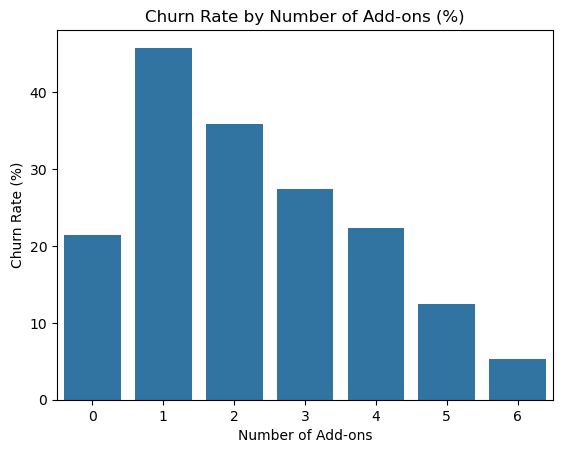

In [39]:
# Count how many add-ons each customer has by summing 'Yes' in add-on columns
# Then calculate churn rate grouped by number of add-ons
query = """
SELECT 
    (CASE WHEN Online_Security = 'Yes' THEN 1 ELSE 0 END) +
    (CASE WHEN Online_Backup = 'Yes' THEN 1 ELSE 0 END) +
    (CASE WHEN Device_Protection = 'Yes' THEN 1 ELSE 0 END) +
    (CASE WHEN Tech_Support = 'Yes' THEN 1 ELSE 0 END) +
    (CASE WHEN Streaming_TV = 'Yes' THEN 1 ELSE 0 END) +
    (CASE WHEN Streaming_Movies = 'Yes' THEN 1 ELSE 0 END) AS add_on_count,
    Churn_Label
FROM telco_customer_churn;
"""

cur.execute(query)
data = cur.fetchall()

# Convert to DataFrame
df_addons = pd.DataFrame(data, columns=['add_on_count', 'Churn_Label'])

# Calculate churn rate by number of add-ons
df_summary = df_addons.groupby('add_on_count')['Churn_Label'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='churn_rate')

# Plot churn rate by add-on count
sns.barplot(data=df_summary, x='add_on_count', y='churn_rate')
plt.title("Churn Rate by Number of Add-ons (%)")
plt.xlabel("Number of Add-ons")
plt.ylabel("Churn Rate (%)")
plt.show()
